# Tratamiento de los datos agregados en la reentrega

Para la reentrega vamos a considerar dos datos similares. "Population using safely managed drinking-water services (%)" y "Population using safely managed sanitation services (%)".

En este notebook vamos a realizar el procesamiento inicial sobre estos datos. Cargándolos y calculando el promedio del período a considerar.

In [1]:
# Cargamos las bibliotecas a usar
import pandas as pd
import seaborn as sns

## _"Population using safely managed drinking-water services (%)"_.

In [2]:
# Cargo todos los datos
drinking_water = pd.read_csv('../data/crudos/safely-managed-drinking-water-services.csv')
# Filtro sólo los resultados totales en el rango que me importa
drinking_water = drinking_water[(drinking_water['Dim1'] == 'Total') & (drinking_water['Period'] <= 2015)]
# Tomo sólo las columnas que me importan
drinking_water = drinking_water[['ParentLocation', 'Location', 'FactValueNumeric']]
# Saco el promedio de los datos
# NOTA: El promedio es sobre los años para los cuales se informaron datos (osea se ignoran NaNs)
drinking_water = drinking_water.groupby(['ParentLocation', 'Location']).mean()
drinking_water.columns = ['Population using safely managed drinking-water services (%)']

drinking_water

Population using safely managed drinking-water services (%)
ParentLocation  Location                                                                    
Africa          Algeria                                                  73.660000          
                Angola                                                         NaN          
                Benin                                                          NaN          
                Botswana                                                       NaN          
                Burkina Faso                                                   NaN          
...                                                                            ...          
Western Pacific Solomon Islands                                                NaN          
                Tonga                                                    29.358125          
                Tuvalu                                                         NaN          
                Vanuatu                                                        NaN          
                Viet Nam                                                       NaN          

[196 rows x 1 columns]

Y... escribimos los resultados en un csv para que sea más fácil cargarlos en el futuro.

In [3]:
drinking_water.to_csv('../data/drinking-water-averaged.csv')

# Se ve masomenos así
!head ../data/drinking-water-averaged.csv | column -t -s ,

ParentLocation  Location                  Population using safely managed drinking-water services (%)
Africa          Algeria                   73.66
Africa          Angola                    
Africa          Benin                     
Africa          Botswana                  
Africa          Burkina Faso              
Africa          Burundi                   
Africa          Cabo Verde                
Africa          Cameroon                  
Africa          Central African Republic  7.575


Una pregunta ¿Cómo se distribuyen las regiones con/sin datos?

In [4]:
def compare_with_and_without_data(df, column):
    # Tomo los países sin data
    countries_without_data_per_region = df[df[column].isna()]
    # Agarro sólo las columnas que me interesan
    countries_without_data_per_region = countries_without_data_per_region[['ParentLocation', 'Location']]
    # Agrupo y cuento la cantidad de países
    countries_without_data_per_region = countries_without_data_per_region.groupby('ParentLocation').count()
    # Renombro la columna
    countries_without_data_per_region.columns = ['without data']

    # Tomo los países con data
    countries_with_data_per_region = df[~ df[column].isna()]
    # Agarro sólo las columnas que me interesan
    countries_with_data_per_region = countries_with_data_per_region[['ParentLocation', 'Location']]
    # Agrupo y cuento la cantidad de países
    countries_with_data_per_region = countries_with_data_per_region.groupby('ParentLocation').count()
    # Renombro la columna
    countries_with_data_per_region.columns = ['with data']

    # Tomo todos los países y agarro sólo las columnas que me interesan
    countries_per_region = df[['ParentLocation', 'Location']]
    # Agrupo y cuento la cantidad de países
    countries_per_region = countries_per_region.groupby('ParentLocation').count()
    # Renombro la columna
    countries_per_region.columns = ['Countries']

    return countries_per_region.join([countries_with_data_per_region, countries_without_data_per_region])

compare_with_and_without_data(drinking_water.reset_index(), 'Population using safely managed drinking-water services (%)')

,Countries,with data,without data
ParentLocation,,,
Africa,47,19,28
Americas,36,14,22
Eastern Mediterranean,22,13,9
Europe,53,52,1
South-East Asia,11,5,6
Western Pacific,27,14,13


Finalmente, miremos un poco la distribución de los datos:

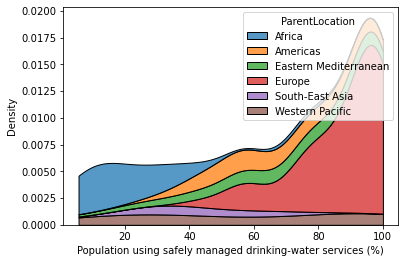

In [5]:
sns.kdeplot(data=drinking_water,
             x='Population using safely managed drinking-water services (%)',
             hue='ParentLocation',
             cut=0,
             multiple='stack')

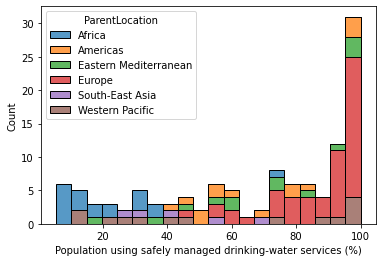

In [6]:
sns.histplot(data=drinking_water,
             x='Population using safely managed drinking-water services (%)',
             hue='ParentLocation',
             multiple='stack',
             bins=20)

## _"Population using safely managed sanitation services (%)"_

In [7]:
# Cargo todos los datos
sanitation_services = pd.read_csv('../data/crudos/safely-managed-sanitation-services.csv')
# Filtro sólo los resultados totales en el rango que me importa
sanitation_services = sanitation_services[(sanitation_services['Dim1'] == 'Total') & (sanitation_services['Period'] <= 2015)]
# Tomo sólo las columnas que me importan
sanitation_services = sanitation_services[['ParentLocation', 'Location', 'FactValueNumeric']]
# Saco el promedio de los datos
# NOTA: El promedio es sobre los años para los cuales se informaron datos (osea se ignoran NaNs)
sanitation_services = sanitation_services.groupby(['ParentLocation', 'Location']).mean()
sanitation_services.columns = ['Population using safely managed sanitation services (%)']

sanitation_services

Population using safely managed sanitation services (%)
ParentLocation  Location                                                                
Africa          Algeria                                                  20.226250      
                Angola                                                         NaN      
                Benin                                                          NaN      
                Botswana                                                       NaN      
                Burkina Faso                                                   NaN      
...                                                                            ...      
Western Pacific Solomon Islands                                                NaN      
                Tonga                                                    34.761875      
                Tuvalu                                                    5.577333      
                Vanuatu                                                        NaN      
                Viet Nam                                                       NaN      

[196 rows x 1 columns]

Tomemos una vista rápida a qué datos nos faltan:

In [8]:
compare_with_and_without_data(sanitation_services.reset_index(), 'Population using safely managed sanitation services (%)')

,Countries,with data,without data
ParentLocation,,,
Africa,47,20,27
Americas,36,16,20
Eastern Mediterranean,22,16,6
Europe,53,48,5
South-East Asia,11,6,5
Western Pacific,27,14,13


Igual que antes, escribimos un csv para poder usar más en el análisis exploratorio.

In [9]:
sanitation_services.to_csv('../data/sanitation-services-averaged.csv')

# Se ve masomenos así
!head ../data/sanitation-services-averaged.csv | column -t -s ,

ParentLocation  Location                  Population using safely managed sanitation services (%)
Africa          Algeria                   20.22625
Africa          Angola                    
Africa          Benin                     
Africa          Botswana                  
Africa          Burkina Faso              
Africa          Burundi                   
Africa          Cabo Verde                
Africa          Cameroon                  
Africa          Central African Republic  17.93125


Y para cerrar otro histplot para mirar la distribución de los datos:

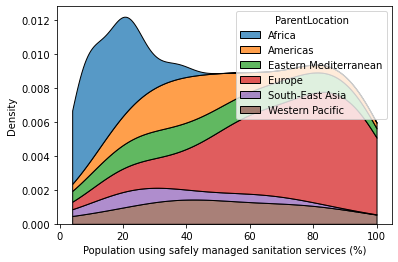

In [10]:
sns.kdeplot(data=sanitation_services,
             x='Population using safely managed sanitation services (%)',
             hue='ParentLocation',
             cut=0,
             multiple='stack')

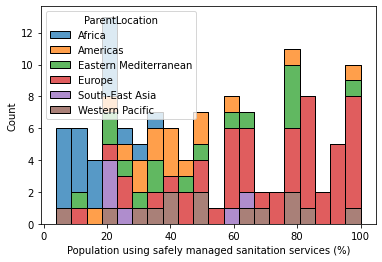

In [11]:
sns.histplot(data=sanitation_services,
             x='Population using safely managed sanitation services (%)',
             hue='ParentLocation',
             multiple='stack',
             bins=20)

# Correlación entre los datos

Finalmente, es claro que tomamos dos datos que miden cosas bastante similares (acceso a servicios básicos con mínimos estándares de seguridad). Es por esto que vale la pena considerar la colinearidad de estos (y a la hora de usarlos en el modelo usar uno solo o combinarlos).

La correlación entre ambos es 0.78429192176435


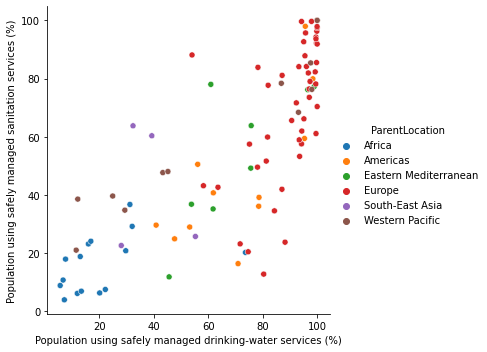

In [12]:
joined_data = drinking_water.reset_index().merge(sanitation_services, on=['Location'])
sns.relplot(data=joined_data,
            x='Population using safely managed drinking-water services (%)',
            y='Population using safely managed sanitation services (%)',
            hue='ParentLocation')
print('La correlación entre ambos es', joined_data.corr().iloc[0][1])